In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report
import nltk
from nltk.corpus import stopwords
import re
import warnings
import joblib

In [2]:
# Configuration and warnings
warnings.filterwarnings('ignore')
sns.set()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soly/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
# Load dataset
data = pd.read_csv(r"F:\study\4th year CS\AI2\project\Updated_Restaurant_Reviews_Manual5000-.csv")
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  3805 non-null   object 
 1   Liked   3809 non-null   float64
dtypes: float64(1), object(1)
memory usage: 65.5+ KB
None
(4181, 2)


Review    376
Liked     372
dtype: int64


<Axes: >

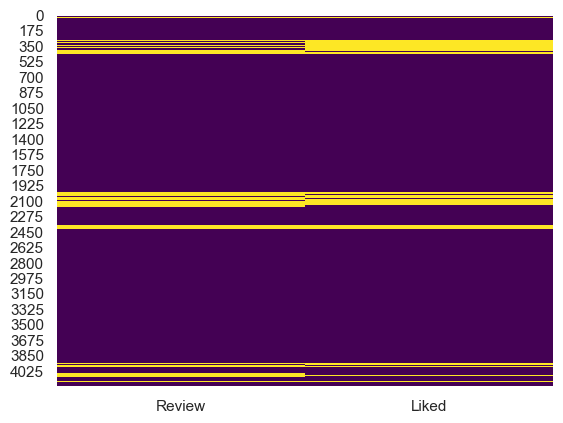

In [10]:
# Check for missing values
print(data.isna().sum())
sns.heatmap(data.isna(), cbar=False, cmap="viridis")

In [11]:
# Drop missing values if any
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [12]:
data

,Review,Liked
0,"Terrible experience, won't be coming back.",0.0
1,"I had high hopes, but the food was really disa...",0.0
2,"The food was absolutely amazing, I cherished it!",1.0
3,I can't wait to come back! Highly recommend.,1.0
4,"Everything was just perfect, from the starters...",1.0
...,...,...
3706,I dressed up to be treated so rudely!,0.0
3707,It was probably dirt.,0.0
3708,"Love this venue, hits the spot when I want som...",1.0
3709,I ordered the Lemon raspberry ice cocktail whi...,1.0


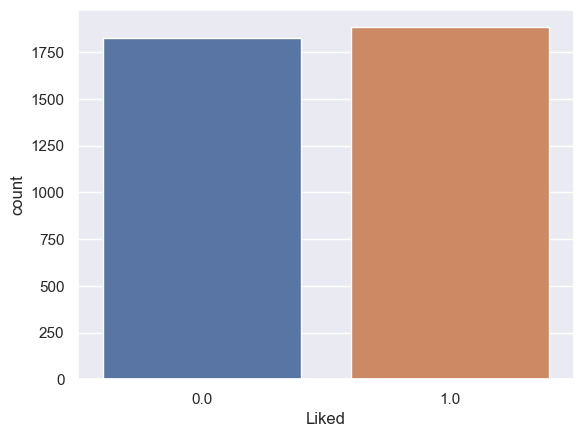

In [23]:
# Data visualization
sns.countplot(x=data["Liked"],hue=data["Liked"])
plt.legend().remove()

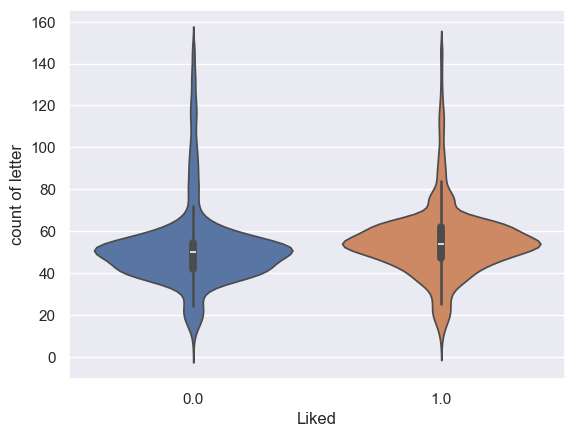

In [25]:
data["count of letter"] = data["Review"].apply(len)
sns.violinplot(x=data["Liked"], y=data["count of letter"],hue=data["Liked"])
plt.legend().remove()

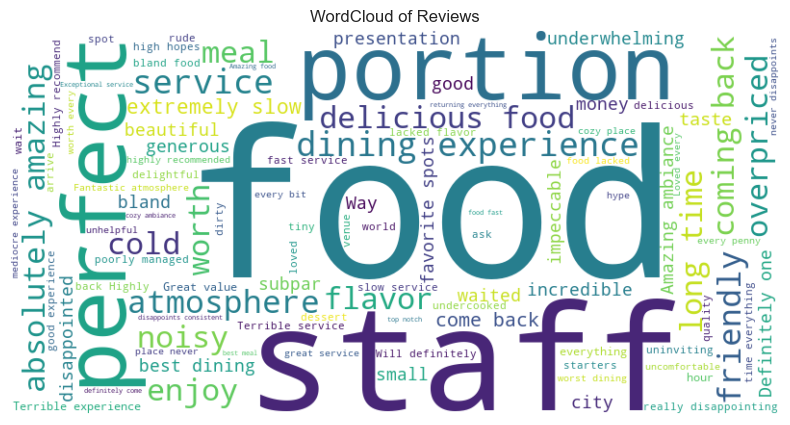

In [26]:
# Generate WordCloud
all_reviews = ' '.join(data['Review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Reviews")
plt.show()


In [118]:
s = data ['Review' ][0]
s

"Terrible experience, won't be coming back."

In [119]:
s =re.sub('[^a-zA-Z]'," ",s)
s

'Terrible experience  won t be coming back '

In [120]:
s = s.lower()
s

'terrible experience  won t be coming back '

In [121]:
s = s.split()
s

['terrible', 'experience', 'won', 't', 'be', 'coming', 'back']

In [122]:
s=[ word for word in s if word not in stopwords.words('english')]
s

['terrible', 'experience', 'coming', 'back']

In [124]:
s = ' '.join(s)
s

'terrible experience coming back'

In [125]:
cv = CountVectorizer()
cv.fit_transform(s.split()).toarray()

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]], dtype=int64)

In [27]:
# Preprocessing function
corpus=[]
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', " ", text)  # Keep only letters
    text = text.lower()  # Lowercase
    text = text.split()  # Tokenize
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

In [28]:
# Applying preprocessing to all reviews
corpus = [preprocess_text(review) for review in data['Review']]

In [29]:
corpus[:30]

['terrible experience coming back',
 'high hopes food really disappointing',
 'food absolutely amazing cherished',
 'wait come back highly recommend',
 'everything perfect starters desserts',
 'terrible experience coming back',
 'suggest restaurant',
 'food absolutely amazing adored',
 'food overpriced underwhelming',
 'terrible experience coming back',
 'cozy place delicious food',
 'suggest restaurant',
 'staff rude atmosphere uninviting',
 'portions small taste subpar',
 'everything perfect starters desserts',
 'good experience place dirty poorly managed',
 'food absolutely amazing loved',
 'high hopes food really disappointing',
 'everything perfect starters desserts',
 'food overpriced underwhelming',
 'best dining experience long time',
 'suggest restaurant',
 'terrible experience coming back',
 'good experience place dirty poorly managed',
 'waited hour food worth',
 'definitely one favorite spots city',
 'portions small taste subpar',
 'way noisy enjoy meal',
 'food absolutely 

In [30]:
# Feature extraction
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = data['Liked'].values

In [128]:
print(X,"\n\n----------\n\n",y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

----------

 [0. 0. 1. ... 1. 1. 0.]


In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [34]:
# Logistic Regression Model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_pred_lr = LR_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

In [48]:
# Decision Tree Model
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train, y_train)
y_pred_dt = RT_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_rt)

In [36]:
# Random Forest Model
RF_model = RandomForestClassifier(random_state=42, n_estimators=100)
RF_model.fit(X_train, y_train)
y_pred_rf = RF_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [37]:
# KNN Model
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
y_pred_knn = KNN_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

In [60]:
# Support Vector Machine 

svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svm= svc_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

In [64]:
# Naive Bayes
NB_model = MultinomialNB()
NB_model.fit(X_train,y_train)
y_pred_nb=NB_model.predict(X_test)
nb_accuracy=accuracy_score(y_test,y_pred_nb)

In [65]:
# Display Results
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision TreeAccuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Logistic Regression Accuracy: 0.9439655172413793
Random Tree Accuracy: 0.9418103448275862
Random Forest Accuracy: 0.9385775862068966
KNN Accuracy: 0.9116379310344828
SVM Accuracy: 0.9428879310344828
Naive Bayes Accuracy: 0.9396551724137931


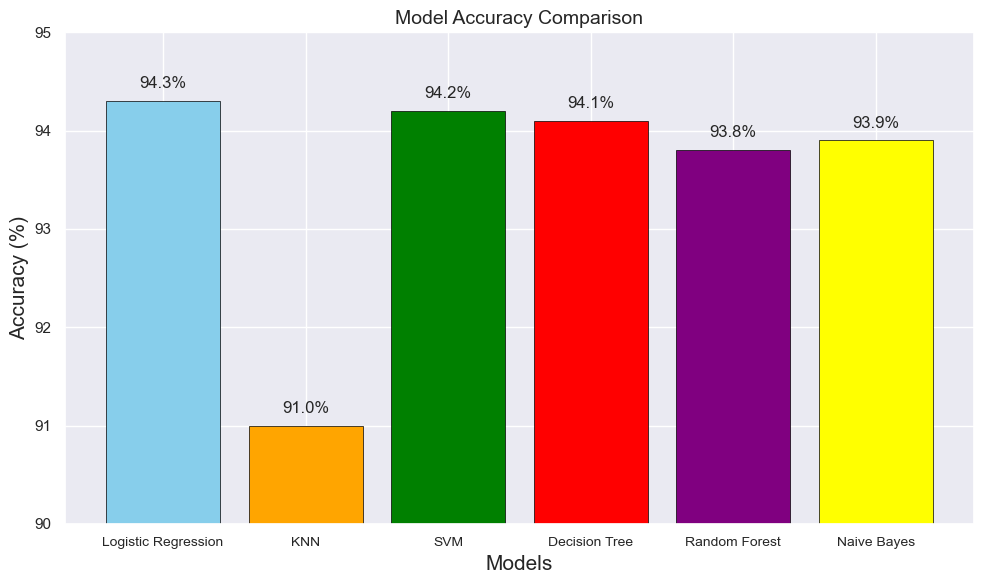

In [117]:
# Updated model performance data (provided by user)
models = ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "Naive Bayes"]
accuracies = [94.3, 91.0, 94.2, 94.1, 93.8, 93.9]

# 1. Bar Chart for Model Accuracies
x = np.arange(len(models))  # Label locations
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
bars = ax.bar(x, accuracies, color=['skyblue', 'orange', 'green', 'red', 'purple', 'yellow'],edgecolor='black', linewidth=0.5)
ax.set_ylim(90, 95)

# Add labels, title, and customize ticks
ax.set_xlabel('Models', fontsize=15)
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_title('Model Accuracy Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, fontsize=10)

# Add value annotations on bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_accuracy_comparison.png')
plt.show()

In [66]:
# Confusion Matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_ = confusion_matrix(y_test, y_pred_nb)

In [50]:
cm_lr

array([[432,  22],
       [ 30, 444]], dtype=int64)

In [51]:
cm_rf

array([[438,  16],
       [ 41, 433]], dtype=int64)

In [52]:
cm_dt

array([[433,  21],
       [ 33, 441]], dtype=int64)

In [53]:
cm_knn

array([[438,  16],
       [ 66, 408]], dtype=int64)

In [67]:
cm_svm

array([[445,   9],
       [ 44, 430]], dtype=int64)

In [68]:
cm_nb

array([[428,  26],
       [ 30, 444]], dtype=int64)

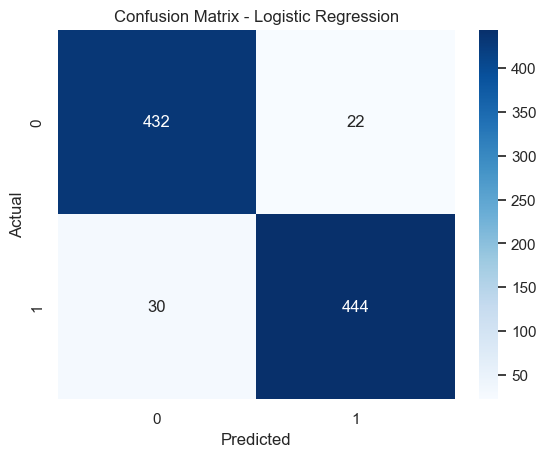

In [132]:
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix_comparison.png')
plt.show()










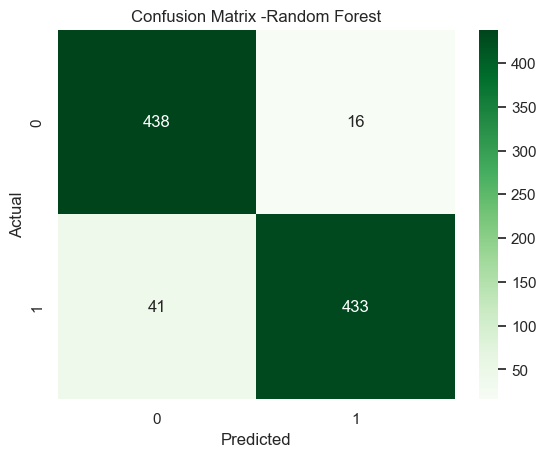

In [134]:
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Greens",)
plt.title("Confusion Matrix -Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix_comparison1.png')
plt.show()




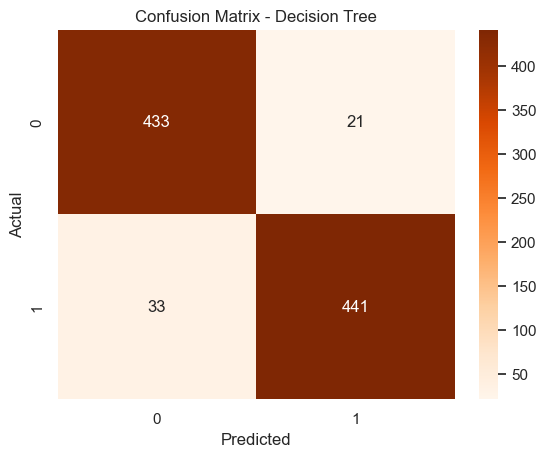

In [135]:
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="Oranges",)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix_comparison2.png')
plt.show()




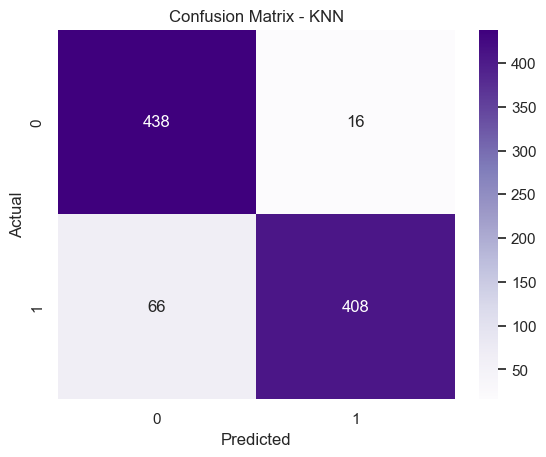

In [136]:
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Purples",)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix_comparison3.png')
plt.show()



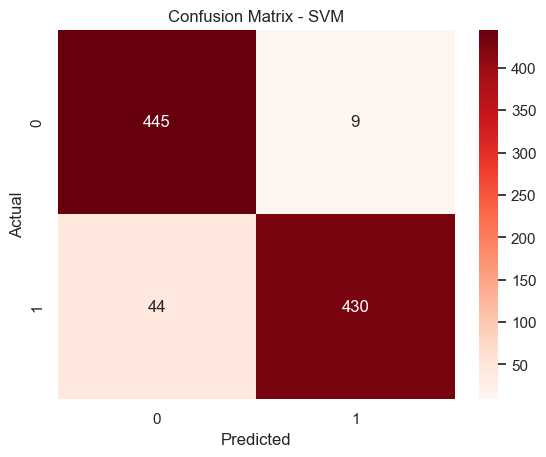

In [137]:
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="Reds",)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix_comparison4.png')
plt.show()



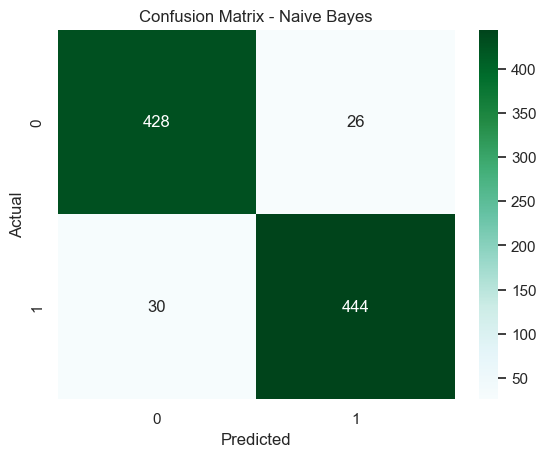

In [138]:
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="BuGn",)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix_comparison5.png')
plt.show()


In [56]:
# Testing with new review
def predict_review(new_review, model):
    processed_review = preprocess_text(new_review)
    vectorized_review = cv.transform([processed_review]).toarray()
    result = model.predict(vectorized_review)
    return "Positive Review" if result == 1 else "Negative Review"

In [57]:
# Input for testing
nnnew_review = input("Enter a review: ")
print(predict_review(nnnew_review, RF_model))

Enter a review:  it was very bad to mee


Negative Review
